### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df = pd.read_csv('The E-commerce Dataset.csv')
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [87]:
df.shape

(20000, 11)

In [88]:
df.columns

Index(['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness',
       'gender', 'category', 'item_id', 'item_price', 'user_city'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


In [90]:
user_genders = df['gender']
user_genders.describe()

count     19973
unique        2
top           M
freq      10154
Name: gender, dtype: object

In [91]:
len(user_genders)

20000

In [92]:
user_ratings = df["rating"]
user_ratings.describe()

count    19983.000000
mean         3.701847
std          1.404619
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [93]:
len(user_ratings)

20000

In [94]:
user_helpfulness = df["helpfulness"]
user_helpfulness.describe()

count    19978.000000
mean         2.596306
std          1.750681
min          0.000000
25%          0.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: helpfulness, dtype: float64

In [95]:
len(user_helpfulness)

20000

In [96]:
df.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [97]:
pre_clean_df = df.dropna()
pre_clean_df.shape

(19934, 11)

In [98]:
user_genders = pre_clean_df['gender']
user_ratings = pre_clean_df['rating']
user_helpfulness = pre_clean_df['helpfulness']

In [99]:
print(len(user_genders))
print(len(user_ratings))
print(len(user_helpfulness))

19934
19934
19934


In [100]:
none = df[df.review == "none"]
none

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
438,71,60900,none,Gladiator,5.0,4.0,M,Movies,30,65.17,13
1222,4461,31903,none,McDonald's,1.0,3.0,M,Restaurants & Gourmet,41,30.74,22
2587,4896,52302,none,Pearl Harbor,2.0,3.0,M,Movies,53,141.75,30
2863,4980,72100,none,MTV,2.0,4.0,F,Media,39,138.00,19
6284,6148,10300,none,AOL (America Online),1.0,4.0,M,Online Stores & Services,0,145.84,32
7569,6560,80300,none,What Lies Beneath,3.0,4.0,F,Movies,85,145.00,14
9230,7123,111799,none,NetZero,5.0,0.0,M,Online Stores & Services,46,53.00,0
9438,7206,21000,none,Blair Witch Project,5.0,0.0,M,Movies,12,44.00,6
11046,7731,62800,none,The Sims 2: Open for Business for Windows,5.0,3.0,M,Games,79,27.00,12
12221,8167,111499,none,Dogma,4.0,4.0,M,Movies,22,87.59,22


In [101]:
none.describe()

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,6671.666667,53639.555556,3.277778,3.111111,40.666667,80.371111,16.277778
std,3110.388362,31704.337523,1.487420,1.490712,26.727382,46.885513,12.437162
min,71.000000,10300.000000,1.000000,0.000000,0.000000,27.000000,0.000000
25%,4917.000000,23731.000000,2.000000,3.000000,17.500000,45.250000,5.000000
50%,7164.500000,56601.000000,3.500000,4.000000,43.500000,56.000000,13.500000
75%,9074.000000,71850.000000,4.750000,4.000000,60.000000,137.397500,28.000000
max,10489.000000,111799.000000,5.000000,4.000000,85.000000,145.840000,39.000000


In [102]:
clean_df = pre_clean_df[pre_clean_df.review != "none"]
clean_df.shape

(19916, 11)

In [103]:
clean_df.isnull().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [104]:
clean_df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [105]:
#Q2.1
unique_user = clean_df["userId"].nunique()
print("Total unique user:", unique_user)
unique_reviews = clean_df["review"].nunique()
print("Total unique reviews:", unique_reviews)
unique_items = clean_df['item'].nunique()
print("Total unique items:", unique_items)
unique_categories = clean_df['category'].nunique()
print("Total unique categories:", unique_categories)

Total unique user: 8562
Total unique reviews: 19459
Total unique items: 89
Total unique categories: 9


In [106]:
df1 = clean_df.pivot_table(index = ['item'], aggfunc = 'size')
print(df1)

item
AOL (America Online)     939
All Advantage            657
Alta Vista (by 1stUp)    157
Amazon.com               240
American Airlines        185
                        ... 
Wendy's                  210
What Lies Beneath        160
X-Men                    245
X.com                    173
eBay                     596
Length: 89, dtype: int64


In [107]:
#Q2.2:
rating = clean_df['rating']
rating.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [108]:
#Q2.3: 
males = clean_df[clean_df.gender =="M"]
females = clean_df[clean_df.gender =="F"]

item_males = males["item"]
item_females = females["item"]

print(item_males.describe())
print(item_females.describe())

count                    10123
unique                      89
top       AOL (America Online)
freq                       482
Name: item, dtype: object
count                     9793
unique                      89
top       AOL (America Online)
freq                       457
Name: item, dtype: object


In [109]:
df_2 = clean_df.groupby(['gender']).agg(count=('item', "count"))
df_2.agg({"count": ["min",'max',"mean",'std']})

,count
min,9793.000000
max,10123.000000
mean,9958.000000
std,233.345238


In [110]:
males_2 = males.groupby(['item']).agg(count=('item', "count"))
males_2 
min_males_count = males_2['count'].min()
max_males_count = males_2['count'].max()
mean_males_count = males_2['count'].mean()
std_males_count = males_2['count'].std()
print("Min males count:", min_males_count)
print("Max males count:", max_males_count)
print("Mean males count:", mean_males_count)
print("Standard deviation males count:", std_males_count)

Min males count: 64
Max males count: 482
Mean males count: 113.74157303370787
Standard deviation males count: 60.33081680690519


In [111]:
females_2 = females.groupby(['item']).agg(count=('item', "count"))
females_2 
min_females_count = females_2['count'].min()
max_females_count = females_2['count'].max()
mean_females_count = females_2['count'].mean()
std_females_count = females_2['count'].std()
print("Min females count:", min_females_count)
print("Max females count:", max_females_count)
print("Mean females count:", mean_females_count)
print("Standard deviation females count:", std_females_count)

Min females count: 59
Max females count: 457
Mean females count: 110.03370786516854
Standard deviation females count: 57.09351368950494


In [112]:
#Q2.4
df2 = clean_df.pivot_table(index = ['item','rating'], aggfunc = 'size')
print(df2['AOL (America Online)'])

rating
1.0    303
2.0    218
3.0    166
4.0    149
5.0    103
dtype: int64


In [113]:
#Situation 1: Min and Max of the rating value. 
clean_df.groupby(["item"]).agg({'rating':['count','min','max','std','mean']})

rating                              
                       count  min  max       std      mean
item                                                      
AOL (America Online)     939  1.0  5.0  1.368528  2.500532
All Advantage            657  1.0  5.0  1.541706  3.412481
Alta Vista (by 1stUp)    157  1.0  5.0  1.263341  3.541401
Amazon.com               240  1.0  5.0  1.571095  3.683333
American Airlines        185  1.0  5.0  1.417015  3.054054
...                      ...  ...  ...       ...       ...
Wendy's                  210  1.0  5.0  1.093322  3.971429
What Lies Beneath        160  1.0  5.0  1.201676  3.450000
X-Men                    245  1.0  5.0  0.853074  4.118367
X.com                    173  1.0  5.0  1.474409  4.023121
eBay                     596  1.0  5.0  0.949618  4.333893

[89 rows x 5 columns]

In [114]:
#Situation 2: Min and Max of the number of ratings. 
clean_df.groupby(["item",'rating']).agg({"rating":['count']}).groupby("item").agg(["min", "max", "std", "mean"])

rating                        
                       count                        
                         min  max         std   mean
item                                                
AOL (America Online)     103  303   76.411387  187.8
All Advantage             81  239   64.228498  131.4
Alta Vista (by 1stUp)     16   60   18.077610   31.4
Amazon.com                15  113   39.420807   48.0
American Airlines         27   51    9.082951   37.0
...                      ...  ...         ...    ...
Wendy's                    7   81   34.066112   42.0
What Lies Beneath          9   42   13.856406   32.0
X-Men                      3  112   48.764741   49.0
X.com                     10  107   40.930429   34.6
eBay                      14  334  137.461631  119.2

[89 rows x 4 columns]

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [115]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline

In [116]:
# Create a Boxplot to make comparison between Gender and rating.
males_3 = males.groupby(['rating']).agg(count=('rating', "count"))
females_3 = females.groupby(['rating']).agg(count=('rating', "count"))
males_3

,count
rating,
1.0,1263
2.0,1135
3.0,1206
4.0,2426
5.0,4093


In [117]:
grouped = clean_df.groupby(['gender','rating']).agg(count=('rating', "count"))
comparison = grouped.reset_index()
comparison

,gender,rating,count
0,F,1.0,1146
1,F,2.0,1077
2,F,3.0,1200
3,F,4.0,2345
4,F,5.0,4025
5,M,1.0,1263
6,M,2.0,1135
7,M,3.0,1206
8,M,4.0,2426
9,M,5.0,4093


Text(0.5, 1.0, 'Correlation between Gender and Rating')

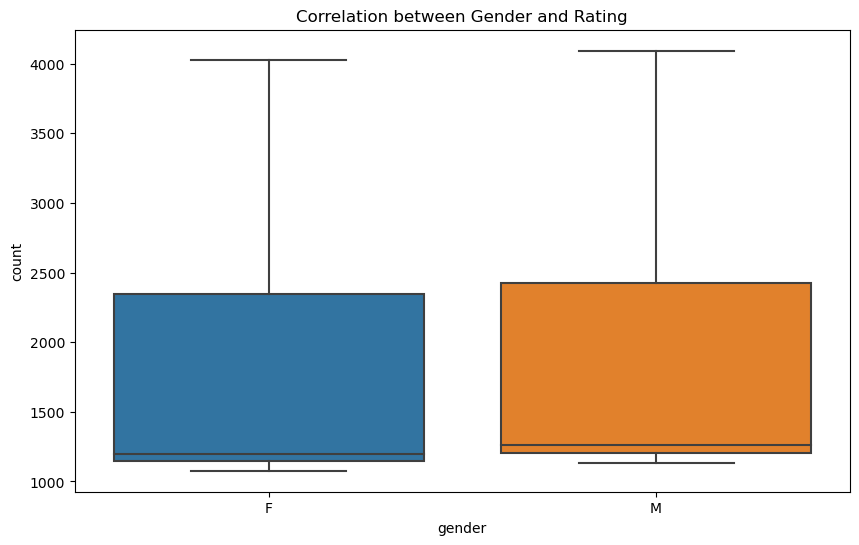

In [118]:
plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y= 'count', data=comparison, orient="v")
plt.title("Correlation between Gender and Rating")

<Axes: xlabel='Rating', ylabel='Samples'>

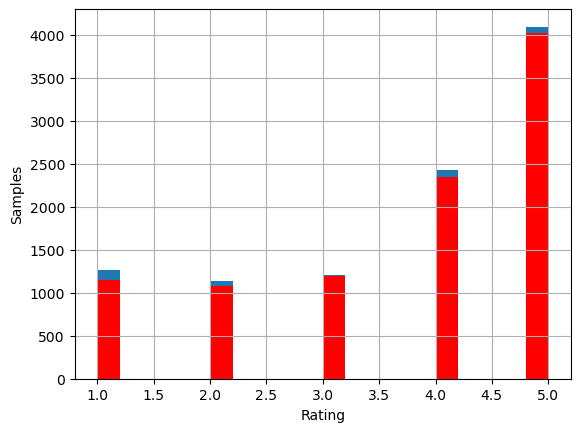

In [119]:
plt.axes(xlabel="Rating", ylabel="Samples")
males.rating.hist(histtype="stepfilled", bins=20, alpha=1)
females.rating.hist(histtype="stepfilled", bins=20, color="red", alpha=1)

# Analysis: 
From the Boxplot above, the rating between the two genders is quite similar. Both categories present a positive skew, which implies that the median is lower than the mean, leading to the fact that both genders tend to rate a higher value (4.0, 5.0) than the lower values. From the Boxplot, it is easily observed that the Male's value is a bit higher than the Female's one due to the larger male samples in this dataset. 

The histogram also indicates a similar trend to the Boxplot. However, males are likely to rate 1.0 more than females.  

In [120]:
# Create a Heatmap to compare Rating vs Helpfulness
group_2 = clean_df.groupby(["rating","helpfulness"]).agg(count = ("helpfulness","count")).reset_index()
group_2

,rating,helpfulness,count
0,1.0,0.0,711
1,1.0,1.0,31
2,1.0,2.0,37
3,1.0,3.0,429
4,1.0,4.0,1201
5,2.0,0.0,678
6,2.0,1.0,6
7,2.0,2.0,19
8,2.0,3.0,350
9,2.0,4.0,1159


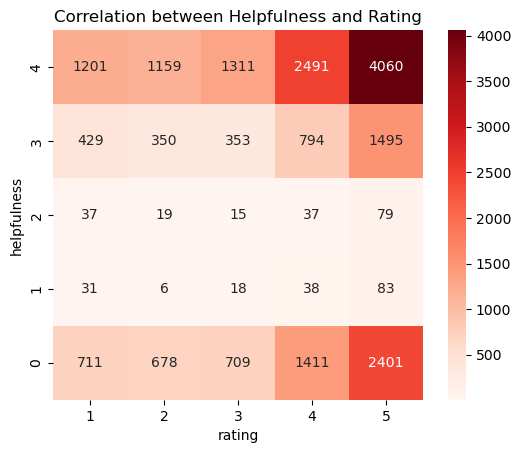

In [121]:
count = [clean_df.loc[clean_df["rating"] == i].groupby(["rating","helpfulness"]).agg({"helpfulness": ["count"]})['helpfulness']["count"] for i in range(1,6)]
count = np.array(count).T
count = pd.DataFrame(count,columns=["1","2","3","4","5"])
ax = sns.heatmap(count, annot=True, square=True, fmt="g", cmap = "Reds")
ax.invert_yaxis()
plt.xlabel("rating") 
plt.ylabel("helpfulness")
plt.title("Correlation between Helpfulness and Rating")
plt.plot();

# Analysis: 
From the heatmap, users rated helpfulness in the value of 1 and 2 as the least. Users mostly focused on the helpfulness value of 0 and 4 for all rating categories. It is undeniable that items with higher ratings occupy the highest samples from the data, but one-third of value 4 and 5 rating indicated 0 helpfulness. It implies that most of the rating 5 values are reliable; however, partial customers still feel that the reviews do not reflect the reality of the items.

In [122]:
# Create a ScatterPlot to make comparison between Category and Rating.
sca = clean_df.groupby(["item"]).agg({"rating":['count','mean']})['rating'].reset_index()
sca

,item,count,mean
0,AOL (America Online),939,2.500532
1,All Advantage,657,3.412481
2,Alta Vista (by 1stUp),157,3.541401
3,Amazon.com,240,3.683333
4,American Airlines,185,3.054054
...,...,...,...
84,Wendy's,210,3.971429
85,What Lies Beneath,160,3.450000
86,X-Men,245,4.118367
87,X.com,173,4.023121


<function matplotlib.pyplot.show(close=None, block=None)>

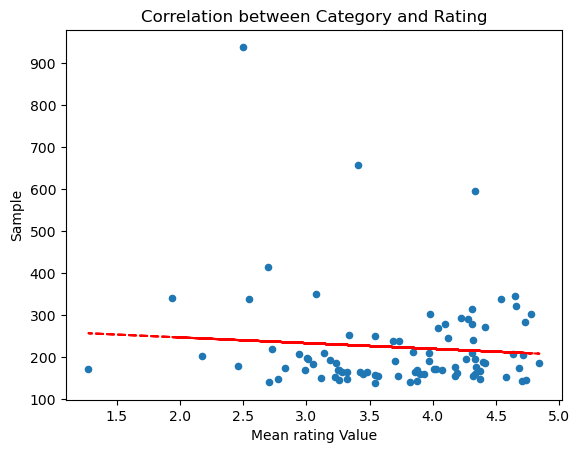

In [123]:
sca.plot(x='mean', y='count', kind='scatter')
plt.title("Correlation between Category and Rating")
plt.xlabel("Mean rating Value")
plt.ylabel("Sample")

x = sca['mean']
y = sca['count']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")
plt.show

In [124]:
print(sca['mean'].corr(sca['count']))

-0.08479927625967272


# Analysis: 
In this scatter plot, there is no apparent correlation or relationship between the categories and and item's rating. The lack of a trend or pattern in the data point suggests that both variables are likely unrelated factors.


# Overall:

Both males and females demonstrated similar rating trends across the dataset which indicates that gender does not significantly influence the propensity to provide ratings. The majority of users assigned ratings in the range of 4 to 5, indicate an overall positive perception of the products. However, helpfulness values of 0 and 4 have the highest frequent appearances, implyng that users are facing extreme review experience (0) or highly positive experience (4). Finally, the absence of correlation between rating values and product categories suggests that users' evaluations are not influnced by categories but other factors which needed further research. 

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [125]:
clean_df.shape

(19916, 11)

In [126]:
clean_df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [127]:
#Reviews of which helpfulness is no more than 2
print(len(clean_df[clean_df.helpfulness <= 2.0]))

6273


In [128]:
clean_df_1 = clean_df.drop(clean_df.index[(clean_df.helpfulness <= 2.0)])
clean_df_1.shape

(13643, 11)

In [129]:
#users who rate less than 7 items
Id = clean_df_1.groupby("userId").agg(item = ('item', 'count'))
print(len(Id[Id['item'] < 7]))
Id = Id.loc[Id['item'] >=7]
Id

6268


,item
userId,
4,7
50,9
56,13
74,12
75,19
...,...
10708,8
10710,7
10759,8


In [130]:
clean_df_2 = clean_df_1.loc[clean_df_1["userId"].isin(Id.index)]
clean_df_2.shape

(2741, 11)

In [131]:
#items that receives less than 11 ratings
item = clean_df_2.groupby('item').agg(number_of_rating = ("rating", "count"))
print(len(item[item.number_of_rating < 11]))
item = item.loc[item['number_of_rating'] >= 11]
item

7


,number_of_rating
item,
AOL (America Online),93
All Advantage,72
Amazon.com,18
American Airlines,19
American Beauty,45
...,...
Wendy's,35
What Lies Beneath,28
X-Men,48


In [132]:
clean_df_3 = clean_df_2.loc[clean_df_2['item'].isin(item.index)]
clean_df_3

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5
